In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 26 22:03:18 2021

@author: pmarc
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt
import statsmodels.api as sm
import scipy.stats as sts
import math


In [2]:

donnee = pd.read_csv('../Fichiers/DonneesBaseballv0r1.csv')
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)

donnee=donnee.dropna()

X=donnee.drop('Salaire (milliers $)', 1)
Y=pd.DataFrame(donnee["Salaire (milliers $)"])


/tmp/ipykernel_176629/1840928108.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=donnee.drop('Salaire (milliers $)', 1)


In [4]:


"Régression linéaire et multicolinéarité"

modele=sm.OLS(Y,X.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(X.assign(const=1))
resultats.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Salaire (milliers $)   R-squared:                       0.528
Model:                              OLS   Adj. R-squared:                  0.497
Method:                   Least Squares   F-statistic:                     17.19
Date:                  Thu, 15 Dec 2022   Prob (F-statistic):           1.02e-31
Time:                          15:25:20   Log-Likelihood:                -1881.4
No. Observations:                   263   AIC:                             3797.
Df Residuals:                       246   BIC:                             3857.
Df Model:                            16                                         
Covariance Type:              nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Présences                    -2.2030      0.636     -3.464      0.001      -3.456      -0.950
Coups sûrs                    7.8278      2.402      3.259      0.001       3.097      12.559
Circuits                      2.1635      6.236      0.347      0.729     -10.120      14.447
Points                       -2.0996      3.008     -0.698      0.486      -8.025       3.826
Sacrifices                   -0.0229      2.610     -0.009      0.993      -5.164       5.119
Buts sur balle                6.1511      1.840      3.342      0.001       2.526       9.776
Années                       -2.5924     12.454     -0.208      0.835     -27.122      21.938
Carrière - Présences         -0.1763      0.137     -1.290      0.198      -0.445       0.093
Carrière - Coups sûrs         0.0698      0.679      0.103      0.918      -1.267       1.407
Carrière - Circuits          -0.2331      1.636     -0.143      0.887      -3.455       2.989
Carrière - Points             1.6101      0.752      2.142      0.033       0.130       3.090
Carrière - Sacrifices         0.8014      0.700      1.145      0.253      -0.577       2.180
Carrière - Buts sur balle    -0.7939      0.332     -2.388      0.018      -1.449      -0.139
Retraits                      0.2946      0.078      3.762      0.000       0.140       0.449
Assistances                   0.3840      0.224      1.716      0.087      -0.057       0.825
Erreurs                      -2.8787      4.421     -0.651      0.516     -11.586       5.829
const                       126.1055     83.624      1.508      0.133     -38.606     290.817
==============================================================================
Omnibus:                       94.079   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              537.346
Skew:                           1.312   Prob(JB):                    2.07e-117
Kurtosis:                       9.492   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIFPanda=pd.DataFrame(VIF)
VIFPanda.index=X.columns
VIFPanda.columns=["VIF"]



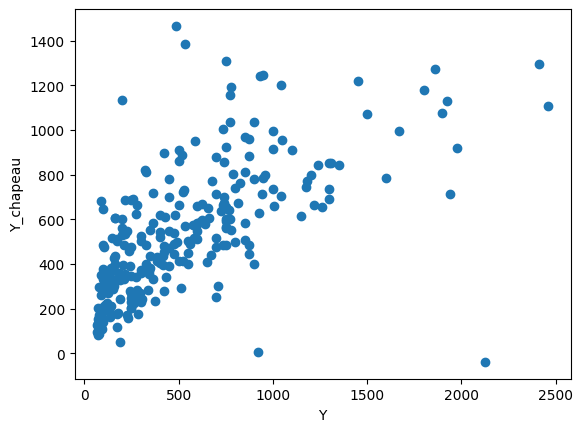

In [6]:


"Régression PLS"


from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score
a=1
pls_model = PLSRegression(n_components=a).fit(X,Y)
Y_chap=pls_model.predict(X)
Y_chap=pd.DataFrame(Y_chap)
R2=r2_score(Y,Y_chap)

plt.scatter(Y, Y_chap)
plt.xlabel("Y")
plt.ylabel("Y_chapeau")
plt.show()


Text(0.5, 0, 'Nombre de composantes principales')

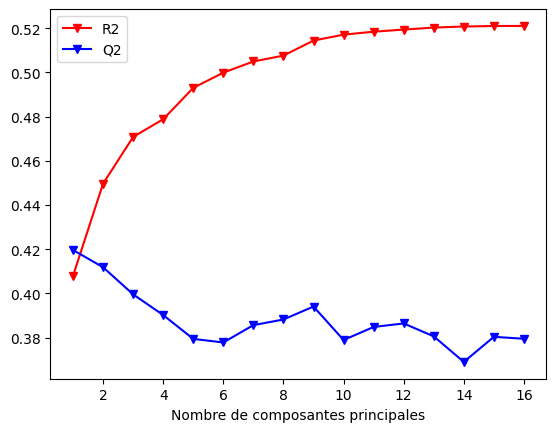

In [7]:

"Déterminer le nombre de composantes principales"


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.5,random_state=50)

R2_global =list()
Q2_global =list()
for i in np.arange(1,X.shape[1]+1):
    pls_model = PLSRegression(n_components=i).fit(X_train,Y_train)
    Y_chap_train=pls_model.predict(X_train)
    Y_chap_train=pd.DataFrame(Y_chap_train)
    Y_chap_train.columns=Y_train.columns
    R2=r2_score(Y_train,Y_chap_train)
    R2_global.append(R2)
    Y_chap_test=pls_model.predict(X_test)
    Y_chap_test=pd.DataFrame(Y_chap_test)
    Y_chap_test.columns=Y_test.columns
    Q2=r2_score(Y_test,Y_chap_test)
    Q2_global.append(Q2)
    
    
ax=plt.plot(np.arange(1,X.shape[1]+1),np.array(R2_global),"-v",c="r",label='R2');
ax=plt.plot(np.arange(1,X.shape[1]+1),np.array(Q2_global),"-v",c="b",label='Q2');
ax=plt.legend()
plt.xlabel("Nombre de composantes principales")


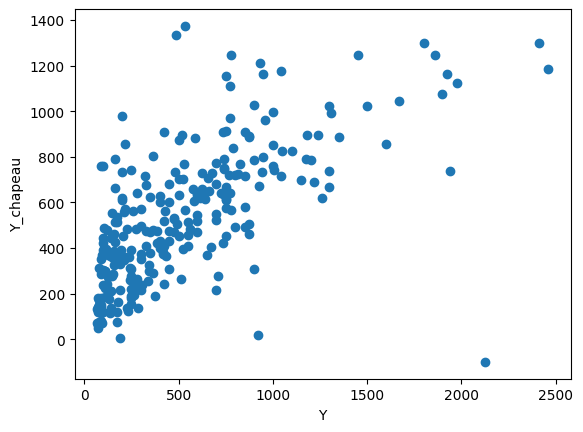

In [8]:

"Choix"

pls_model = PLSRegression(n_components=2, max_iter=10000,tol=1e-10).fit(X,Y)
Y_chap=pls_model.predict(X)
Y_chap=pd.DataFrame(Y_chap)
Y_chap.columns=Y.columns
R2=r2_score(Y,Y_chap)
#R2alt=(((Y_chap-Y.mean())**2).sum())/(((Y-Y.mean())**2).sum())

plt.scatter(Y, Y_chap)
plt.xlabel("Y")
plt.ylabel("Y_chapeau")
plt.show()


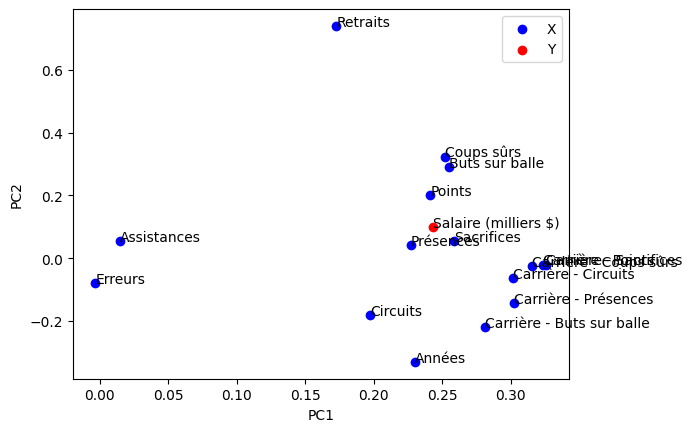

In [10]:
## Quais variáveis x mais influcneciam as variáveis y
## qto mais perto de y, melhor é o x
"Loadings (weights) plot"

W=pls_model.x_weights_
P=pls_model.x_loadings_
W_s=np.dot(W,np.linalg.inv(np.dot(P.T,W)))
X_loadings=pd.DataFrame(W_s)
X_loadings=pd.concat([X_loadings,pd.DataFrame(X.columns)],axis=1)
X_loadings.index=X.columns
X_loadings.columns=['PC1','PC2','Tag']

Y_loadings=pd.DataFrame(pls_model.y_weights_)
Y_loadings=pd.concat([Y_loadings,pd.DataFrame(["Salaire (milliers $)"])],axis=1)
Y_loadings.index=["Salaire (milliers $)"]
Y_loadings.columns=['PC1','PC2','Tag']

PLS_Loadings=pd.concat([X_loadings,Y_loadings],axis=0)

#import plotnine as p9
#graph = p9.ggplot(data=PLS_Loadings,
#           mapping=p9.aes(x='PC1', y='PC2', color='Tag'))
#print(graph + p9.geom_point())


fig, ax = plt.subplots()
ax.scatter(X_loadings['PC1'], X_loadings['PC2'],color='blue',label='X')
ax.scatter(Y_loadings['PC1'], Y_loadings['PC2'],color='red',label='Y')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
#ax.set_xlim([-0.5,0.5])
#ax.set_ylim([-1,1])

for i, txt in enumerate(PLS_Loadings['Tag']):
    ax.annotate(txt, (PLS_Loadings['PC1'][i], PLS_Loadings['PC2'][i]))
ax=plt.legend()


In [11]:


"Calcul des VIP"
#Code proposé de https://github.com/scikit-learn/scikit-learn/issues/7050

T = pls_model.x_scores_
W = pls_model.x_weights_
Q = pls_model.y_loadings_
p, h = W.shape
VIPs = np.zeros((p,))
s = np.diag(T.T @ T @ Q.T @ Q).reshape(h, -1)
total_s = np.sum(s)
for i in range(p):
    weight = np.array([ (W[i,j] / np.linalg.norm(W[:,j]))**2 for j in range(h) ])
    VIPs[i] = np.sqrt(p*(s.T @ weight)/total_s)
VIP_Panda=pd.DataFrame(VIPs)
VIP_Panda.index=X.columns
VIP_Panda.columns=["VIP"]



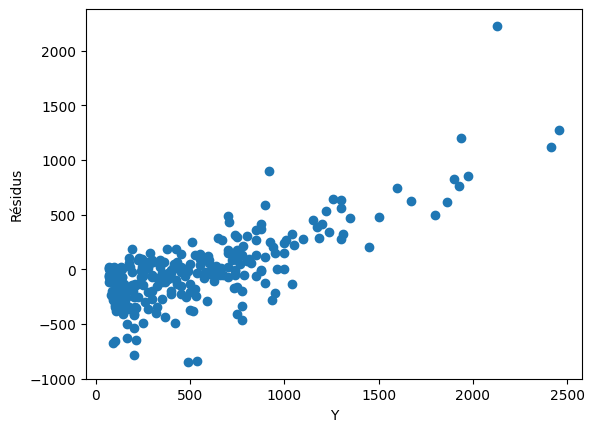

Text(0.5, 0, 'Erreurs')

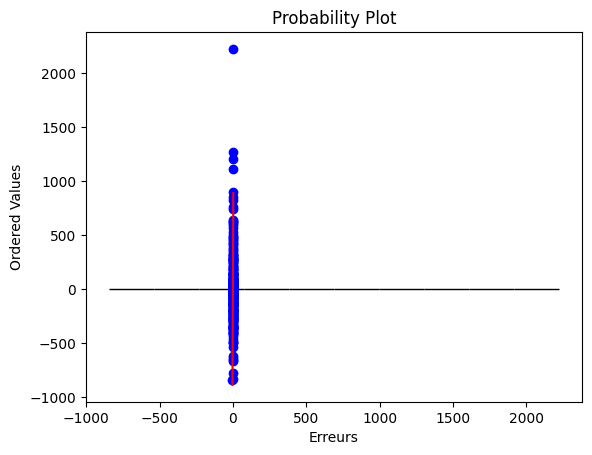

In [12]:

"Vérification modèle"


MatriceR=donnee.corr()

Epsilon=Y.values.reshape(-1,1)-Y_chap.values.reshape(-1,1)
plt.figure(1)
plt.plot(Y, Epsilon, 'o')
plt.xlabel("Y")
plt.ylabel("Résidus")
plt.show()
sts.probplot(Epsilon[:,0],dist=sts.norm, plot=plt.figure().add_subplot(111))
ax=plt.hist(Epsilon,density=True, bins = 10, color = 'blue', edgecolor = 'black')
plt.xlabel("Erreurs")



In [13]:


"Calcul des Betas de régression (Matrice B)"

T=pls_model.x_scores_
x_mean=pls_model.x_mean_
x_std=pls_model.x_std_
y_mean=pls_model.y_mean_
y_std=pls_model.y_std_
Y_std=(Y-y_mean)/y_std
B=np.dot(np.dot(np.dot(W_s,np.linalg.inv(np.dot(T.T,T))),T.T),Y_std)

Y_CHAPEAU=(np.dot(((X-x_mean)/x_std),B))*y_std+y_mean




AttributeError: 'PLSRegression' object has no attribute 'x_mean_'